# Project work

### **TKO_7093 Statistical Data Analysis - autumn 2024**

____

#### Authors:
- Niko Itänen, 2110412
____


### Instructions

Dear Data Scientist Team,

As you know, some time ago we launched a survey to gain information on living habits of individual persons and households. The survey data is now available for analysis. Your task is to analyse which activities people spend their time on and whether there are differences between groups.

The files habits.data and habits.txt contain the data and its documentation, respectively. Given that the complete data set is huge, we need you to focus on specific parts of the data. Use only the following variables in your analysis:

- kohde
- jasen
- pvknro
- sp
- IKAL1
- ASALUE
- V1
- V32
- V68
- V75
- H1b_A
- H1i_A

Note that the files also contain some additional variables. Simply ignore them because they will be analysed by another team. In the current phase of our research process, we need you to address the following tasks and questions:

1. Characterise the individuals that are present in the data. Are there groups of similar persons?
2. Estimate how much time on average households spend daily on each activity.
3. With respect to which activities do men and women differ?
4. With respect to which activities do working days and weekends differ?
5. Which activities are associated with each other?

Design and execute a statistical analysis that addresses these tasks and questions. Write a comprehensive report that documents your analysis and its results. Describe the objective of each step of the analysis, explain what methods you used and why, describe your findings, and finally make conclusions that answer the questions. The report needs to be stand-alone, so show your code and its output, as well.

Looking forward to receiving your report!

Yours,
Head of Research

____

# Planning the project structure

Before starting the implementation, one of most imporant tasks is the planninh the project itself. To ensure our project will progress systematically, we want to see what tasks we are likely to encounter during the project. Here I will outline how I should proceed with this project, but we must remember that the plan itself will not be the final structure of the whole project and it will live during implementation.

In this project I will mostly follow Cross Industry Standard Process for Data Mining (CRISP-DM) framework, which raises good qustions about why we do something.

CRISP-DM has following structure which fits perfectly for our project:

### 1. Define the objectives and questions of project

This task has already been given to us in a message sent to me by our Head of Research. The goal in this project is to analyze time-use data to better understand behavioural patterns among individuals and household. In total, we have 5 different questions and tasks we want to focus in this project.

    1.  Characterise the individuals that are present in the data. Are there groups of similar persons?

    2. Estimate how much time on average households spend daily on each activity.

    3. With respect to which activities do men and women differ?

    4. With respect to which activities do working days and weekends differ?

    5. Which activities are associated with each other?

### 2. Data Understanding

Objective in this part is explore our data and find out what the data itself represent. In this part we could also look if there will be any new potential features that could be formulated based our dataset. Here we want to identify how the labels are formated, are there missing values or other errors in the data we should consider to handle, etc. This part will be really important, where we are getting the information for the next part, which is data processing.

### 3. Data Processing

After the project objectives and data understanding has been done, we should be ready to move on data processing phase, where we want to clean, transform, and prepare the data. We want to make sure that we will have clean data without any outlying, missing, or wrongly reported values. Transforming here means that we could possibly encode our categorical features, or standardize/normalize numerical features for modelling techniques. This phase will help us to find more realible insights from the data, but also give possibility to modelling techniques to work properly.

### 4. Computing some estimation and modelling visualization from the data

Even if the predicting anything specifically with any modelling techniques from the data is not our focus area here, we can still use some simple models such as linear models or even a clustering analysis to get more deeper understanding of how different values could be expected to effect for other features. For instance, we could use linear models to see do men and women differ in time spent in activity or does average time spent on one specific place differ between weekdays or weekends. We will get here more deeper in the implementation phase.

### 5. Test and evaluate estimations

After we have done these visualization and results we are ready to estimate how well these estimations are actually performing and how well we can really generalize these results for higher population. Here we want to calculate some statical tests like p-values, analyse the confidence of correlation and so on. This is imporatnt part to make sure we comparing our data respectively.

### 6. Final Reporting

Finally, we will pack all the insights we have collected to one tight package. Here we want to use visualization techniques to provide our reader much clear picture of the insights as possible. We also want to summarise our findings and think how we could continue even more in the future with the data we have. [1]

Now it is time to move to the work and see what kind of insighs we can achive from the data! 

# Implementation

In [1427]:
# Data Processing libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical libraries
from scipy.stats import ttest_ind
from scipy.stats import shapiro

## Exploratory of Data

Here I will list now all the data we are suppose to use in our project to make clear picture what we have:

| Variable in the dataset | Feature Name | Feature Type |
|--------------| ----------------| -----|
| kohde | Household ID | Nominal (Categorical) |
| jasen | Member ID| Nominal (Categorical) |
| pvknro | Weekday or Weekend | Binary (Categorical) |
| sp | Gender | Binary (Categorical) |
| IKAL1 | Age Group | Ordinal (Categorical)|
| ASALUE | Living Environment | Nominal (Categorical) |
|**Activities**|
| V1 | Working | Ratio (Numerical) |
| V32 | Sleeping | Ratio (Numerical) |
| V68 | Reading | Ratio (Numerical) |
| V75 | Phonecall | Ratio (Numerical) |
|**Places visited (YES/NO)**|
| H1b_A | Theater | Binary (Categorical) |
| H1i_A | Sport Event | Binary (Categorical) |

### Data loading and first observations of the data

Now we want to load the data at the beginning and define these variables we are needed to handle. These variables are mentioned above.

In [ ]:
# Load the data
full_data = pd.read_csv('data/habits.data', sep=';')

# Define the needed variables
needed_variables = ['kohde', 'jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V32', 'V68', 'V75', 'H1b_A', 'H1i_A']

# Create a new dataframe only with the needed variables
formated_data = pd.DataFrame(full_data, columns=needed_variables)

# Print the some data from the dataset to see how it looks.
formated_data.head()

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V32,V68,V75,H1b_A,H1i_A
0,50002,1,2,1,6,1.0,380,450,10,0,2.0,1.0
1,50002,2,2,2,6,1.0,470,480,40,0,2.0,1.0
2,50009,1,2,2,7,1.0,350,460,80,0,1.0,1.0
3,50011,1,2,2,4,3.0,360,430,0,0,1.0,1.0
4,50012,1,1,2,8,1.0,0,600,10,0,1.0,2.0


In [1429]:
# Print the dtypes of the dataset
print(formated_data.dtypes)

kohde       int64
jasen       int64
pvknro      int64
sp          int64
IKAL1       int64
ASALUE    float64
V1         object
V32        object
V68        object
V75        object
H1b_A      object
H1i_A      object
dtype: object


So far, the data types are not set correctly if we look our table in the previous section. We should modify these data types, but I will keep it for later in the data processing part.
For example the activities V1, V32, V68, V75 should not be in object format, because these feature types are ratio (numerical).


Now we want to create some observations on the raw data to understand the structure of data better, but also detect some issues in the data. Now let's try to spot issues like outlier values, missing values, wrong formats, and inconsistent encondings. All these values may be caused pretty easily by, for example, misunderstanding of how to answer a survey, how to label selections, etc.

In [1430]:
# Check the amount of possible missing values in the dataset
print(formated_data.isin(['?', 'NA', 'N/A', 'null', 'None']).sum() | formated_data.isnull().sum())

kohde      0
jasen      0
pvknro     0
sp         0
IKAL1      0
ASALUE     0
V1         5
V32        9
V68        9
V75        8
H1b_A     40
H1i_A     42
dtype: int64


As we can see, there are missing values in the data. All these missing values are in the inputs of activities or places visited, which may most likely mean that individual have not done that specific activity at all, or there are other errors here. In the data processing part we will need to do imputation for these values, meaning that we choose the best value to replace the missing value, depending the nature of the feature.

In [1431]:
# Check the outliers in the dataset
formated_data.describe()

,kohde,jasen,pvknro,sp,IKAL1,ASALUE
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,51012.921795,1.403846,1.464103,1.520513,6.161538,1.510256
std,584.776648,0.490982,0.499030,0.499900,1.603769,0.775853
min,50002.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,50501.750000,1.000000,1.000000,1.000000,5.000000,1.000000
50%,51043.000000,1.000000,1.000000,2.000000,6.000000,1.000000
75%,51517.000000,2.000000,2.000000,2.000000,7.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,9.000000,3.000000


From this describe function, we are able to see some information if there could be any problems with the extreme values in the dataset. So far everything looks pretty good, but we have still one problem that, there is no activities listed here. This is caused because the activites are still in dtype of object. In addition of using describe function, it will be beneficial to create some functions to check manually some numerical outlier values and confirm that these are not going to give any unrealistic values to our analysis part.

###  Numeric Outliers in different variables

There are couple of different unrealistic value possibilities which I want to check first. All these will be listed here:

**Age group value check:**

Check that age group values are somewhere between 1 and 9.

**Gender value check:**

Check that gender value is either 1 or 2.

**Living Environment value check:**

Check that Living Environment value (ASALUE) is somewhere between 1 to 3.

**Activities time checking**

Check that any activity cannot be recorded for more than 24 hours.
There also could be some unrealistic values such as sleeping more than 12 hours, which does not sound very realistic, so we are also checking these values out of our data.
Because the activity values still have wrong data type of string, we are not yet able to make calculation with it. That is why we actually cannot check these yet, so I will need to do that after the data processing part.

In [1432]:
# Age group value check
age_outlier = ~formated_data['IKAL1'].isin(range(1, 10)) # range() does not include the last value
print('Age group values that are not between 1 and 9:', age_outlier.sum())

# Gender value check
gender_outliers = ~formated_data['sp'].isin([1, 2])
print('Gender values that are not 1 or 2:', gender_outliers.sum())

# Living environment value check
le_outliers = ~formated_data['ASALUE'].isin(range(1, 4)) # range() does not include the last value
print('Living environment values that are not between 1 and 3:', le_outliers.sum())

Age group values that are not between 1 and 9: 0
Gender values that are not 1 or 2: 0
Living environment values that are not between 1 and 3: 0


## Data Processing

In [1433]:
formated_data[20:30]

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V32,V68,V75,H1b_A,H1i_A
20,50083,2,1,2,8,1.0,0,480,110,60,2.0,2.0
21,50093,1,1,2,9,1.0,0,570,120,0,2.0,2.0
22,50093,2,1,1,9,1.0,0,470,250,0,2.0,2.0
23,50095,1,1,2,6,3.0,0,480,70,60,1.0,2.0
24,50095,2,1,1,6,3.0,530,420,20,0,?,?
25,50097,1,1,1,6,1.0,0,420,30,0,2.0,1.0
26,50101,1,1,1,6,1.0,0,610,0,?,2.0,1.0
27,50101,2,1,2,6,1.0,0,470,60,0,2.0,1.0
28,50102,1,1,1,4,1.0,450,470,0,0,180.0,180.0
29,50103,1,1,2,8,3.0,00:00,05:50,02:20,00:00,?,1.0


As we can see, there are some incorrectly recorded values in time values. According to the habits.txt description file, the time values should be in minutes, not in hours. I also noticed that the "places visited" rows had some values that were not 1 or 2. I think these records were also entered incorrectly in minutes of visiting instead of using a yes or no value. We can see that missing values in the data are marked with a "?". Instead of using "?" notation, we want to do the imputation for these values to give more stable results on our analysis. Currently it is also little confusing to read the data by these activity code, which why we want to modife these names to more easily readable format.

As we can see from the table where we listed all the different features and their feature types, we can see that all our features should be numerical or binary values.

* TO REMINE WHAT OUR DATA SHOULD LOOK LIKE:

| Variable in the dataset | Feature Name | Feature Type |
|--------------| ----------------| -----|
| kohde | Household ID | Nominal (Categorical) |
| jasen | Member ID| Nominal (Categorical) |
| pvknro | Weekday or Weekend | Binary (Categorical) |
| sp | Gender | Binary (Categorical) |
| IKAL1 | Age Group | Ordinal (Categorical)|
| ASALUE | Living Environment | Nominal (Categorical) |
|**Activities**|
| V1 | Working | Ratio (Numerical) |
| V32 | Sleeping | Ratio (Numerical) |
| V68 | Reading | Ratio (Numerical) |
| V75 | Phonecall | Ratio (Numerical) |
|**Places visited (YES/NO)**|
| H1b_A | Theater | Binary (Categorical) |
| H1i_A | Sport Event | Binary (Categorical) |

## To the data processing

To make sure that our data will be easily handled, lets do following things in the coming code blocks:

1. Change time values and their datatypes to right format.

2. Change binary values to match for habits.txt description.

3. Handle unknown or missing values with the imputation method.
    - As we found out earlier, there are missing values in different activity features and visitied places features. Because activities have feature types of ratio, we should use median value as the replacing value. But in the visited places features while we are having categorical features we want to keep the most likely value here, where taking mode value sounds most sensible.

4. Change the feature names from the codes to easily readable format.

4. Finally, check that all these values will be correctly formated after these modifications.

In [1434]:
# Function to convert time to minutes
def convert_hour_to_minutes(time):
    if isinstance(time, int):
        return float(time)
    
    elif isinstance(time, float):
        return float(time)
    
    elif isinstance(time, str):
        # 00:00 format to minutes
        if ':' in time:
            hours, minutes = map(int, time.split(':'))
            inMinutes = hours * 60 + minutes
            return int(inMinutes)
        elif '.' in time:
            return float(time)
        # If value is in minutes already, return it in float value instead of string.
        elif time.isdigit():
            return float(time)
        else:
            return None
    return None

# Function to check if place columns have only values of 1 or 2. Also return NaN if the value is not valid.
def check_place_columns(place):
    if place == '?' or place == 'NA' or place == 'N/A' or place == 'null' or place == 'None':
        return np.nan
    elif place == '1.0' or place == '2.0':
        return place
    elif place == '0.0':
        return '2.0'
    else:
        return '1.0'

# Convert all the column names to more proper format
formated_data.columns = formated_data.columns.str.replace('kohde', 'Household ID').str.replace('jasen', 'Household Member').str.replace('pvknro', 'Date').str.replace('sp', 'Gender').str.replace('IKAL1', 'Age Group').str.replace('ASALUE', 'Living Environment').str.replace('V1', 'Working').str.replace('V32', 'Sleeping').str.replace('V68', 'Reading').str.replace('V75', 'Phonecall').str.replace('H1b_A', 'Theater').str.replace('H1i_A', 'Sport Event')

# Define the columns that contain time data and places in the dataset separately.
time_features = ['Working', 'Sleeping', 'Reading', 'Phonecall']
place_features = ['Theater', 'Sport Event']

# Loop the earlier created function for all the columns that contain time data
# and convert the time values to minutes.
for row in time_features:
    formated_data.loc[:, row] = formated_data[row].apply(convert_hour_to_minutes)

# Switch time columns to float type
for row in time_features:
    formated_data[row] = pd.to_numeric(formated_data[row])

# Loop the earlier created function which checks that all values are either 1 or 2 in place columns.
for row in place_features:
    formated_data.loc[:, row] = formated_data[row].apply(check_place_columns)

# Switch place columns to Int64 type (Int64 is used to allow also NaN values to be handeled correctly)
for row in place_features:
    formated_data[row] = pd.to_numeric(formated_data[row]).astype('Int64')

# Convert ASALUE column to int type
formated_data['Living Environment'] = pd.to_numeric(formated_data['Living Environment']).astype('int64')

# Map date values to weekdays and weekend
formated_data['Date'] = formated_data['Date'].map({1: 'Working days', 2: 'Weekend'})

# Replace the gender values with more readable values
formated_data['Gender'] = formated_data['Gender'].replace({1: 'Male', 2: 'Female'})

# Encode the living environment values to more readable values
formated_data['Living Environment'] = formated_data['Living Environment'].replace({1: 'City', 2: 'Municipality', 3: 'Rural'})

# If the feature in time column has "?" value, replace it with the median value of the column.
for row in time_features:
    formated_data[row] = formated_data[row].replace('?', np.nan)
    formated_data[row] = pd.to_numeric(formated_data[row], errors='coerce')
    median_value = formated_data[row].median()
    formated_data[row] = formated_data[row].fillna(median_value)

# If the feature in place column has "?" value, the we replace it with the mode value of the column.
# Mode = the most common value in the column.
for row in place_features:
    formated_data[row] = formated_data[row].replace('?', np.nan)
    formated_data[row] = pd.to_numeric(formated_data[row], errors='coerce')
    mode_value = formated_data[row].mode()[0]
    formated_data[row] = formated_data[row].fillna(mode_value)

# Now finally let's do some checking that the data is now correctly modified.
# First we check the NaN values and time values are properly converted
formated_data[20:30]

,Household ID,Household Member,Date,Gender,Age Group,Living Environment,Working,Sleeping,Reading,Phonecall,Theater,Sport Event
20,50083,2,Working days,Female,8,City,0.0,480.0,110.0,60.0,2,2
21,50093,1,Working days,Female,9,City,0.0,570.0,120.0,0.0,2,2
22,50093,2,Working days,Male,9,City,0.0,470.0,250.0,0.0,2,2
23,50095,1,Working days,Female,6,Rural,0.0,480.0,70.0,60.0,1,2
24,50095,2,Working days,Male,6,Rural,530.0,420.0,20.0,0.0,1,2
25,50097,1,Working days,Male,6,City,0.0,420.0,30.0,0.0,2,1
26,50101,1,Working days,Male,6,City,0.0,610.0,0.0,0.0,2,1
27,50101,2,Working days,Female,6,City,0.0,470.0,60.0,0.0,2,1
28,50102,1,Working days,Male,4,City,450.0,470.0,0.0,0.0,1,1
29,50103,1,Working days,Female,8,Rural,0.0,350.0,140.0,0.0,1,1


In [1435]:
# Check the data types
formated_data.dtypes

Household ID            int64
Household Member        int64
Date                   object
Gender                 object
Age Group               int64
Living Environment     object
Working               float64
Sleeping              float64
Reading               float64
Phonecall             float64
Theater                 Int64
Sport Event             Int64
dtype: object

In [1436]:
# Check that there are no more "?" valaues or other missing values in the dataset
print('Missing Values: \n', formated_data.isin(['?', 'NA', 'N/A', 'null', 'None']).sum())

Missing Values: 
 Household ID          0
Household Member      0
Date                  0
Gender                0
Age Group             0
Living Environment    0
Working               0
Sleeping              0
Reading               0
Phonecall             0
Theater               0
Sport Event           0
dtype: Int64


Now our data have been processed and we have nice and clean data what we can use for the incoming tasks. But before moving to the data analysis part, I still want to do the last outlier task, which we cannot do earlier, while the activity times were in object format. Let's do the outlier checking for activity times now.

#### Realistic time value check

In [1437]:
# Check that working time values are realistic
working_outliers = ~formated_data['Working'].isin(range(0, 1440)) # Cannot work more than 24 hours a day
print('Time values that are not between 0 and 1440 minutes:', working_outliers.sum())

# Check that sleeping time values are realistic
sleeping_outliers = ~formated_data['Sleeping'].isin(range(0, 720)) # 720 minutes = 12 hours, which is not usual
print('Time values that are not between 0 and 720 minutes:', sleeping_outliers.sum())

reading_outliers = ~formated_data['Reading'].isin(range(0, 900)) # 900 minutes = 15 hours, which does not feel realistic
print('Time values that are not between 0 and 720 minutes:', reading_outliers.sum())

phonecall_outliers = ~formated_data['Phonecall'].isin(range(0, 720)) # 720 minutes = 12 hours
print('Time values that are not between 0 and 720 minutes:', phonecall_outliers.sum())

# Do the imputation for the outliers in the time columns
formated_data.loc[working_outliers, 'Working'] = formated_data['Working'].median()
formated_data.loc[sleeping_outliers, 'Sleeping'] = formated_data['Sleeping'].median()
formated_data.loc[reading_outliers, 'Reading'] = formated_data['Reading'].median()
formated_data.loc[phonecall_outliers, 'Phonecall'] = formated_data['Phonecall'].median()

Time values that are not between 0 and 1440 minutes: 0
Time values that are not between 0 and 720 minutes: 26
Time values that are not between 0 and 720 minutes: 0
Time values that are not between 0 and 720 minutes: 0


There was indeed some values that might sound unrealistic. For example working more than 24 in practice is not possible here. Sleeping more than 12 hours is not normal condition for healthy person. In some time it might be possible to have sleep more than 12 hours, but it has to be really rare in practice. There was 26 of these cases, why it might be better to imputate with median value of the column.

I also added the imputation methods for other columns too, but only sleeping and working was the feature which will take the effect here.

## Analysing the data

### 1. Characterise the individuals that are present in the data. Are there groups of similar persons?

#### What is the data presenting about the individuals?

The document describing the different variables of the data shows us the following values:

- **Demographic variables**

The demographic variables of the household. The household itself is a group of families, partners or roommates living together and the member is an individual.

These variables also include additional information on the individual's gender, age group and living environment.

- **Activity variable**

Includes variables such as time spent on different activities such as working, sleeping, reading, and having a phonecall.

Information is also collected on places the individual has visited in the last 12 months. Features of our interests here are are visiting in theaters or sports events.

#### What different groups we are able to see from the data?

By looking at the demographic variables, we already have three different groups here.

- **Age Groups**: Which is described by using the numbers from 1 to 9. In each of these groups (except the group 9, which can have more) may have individuals from 5 different ages in total.

- **Gender**: Which describes the gendre of the individual. Male (1) or female (2) in this data.

- **Living Environment:** Indicates whether the individual live in urban, municipality, or rural area.

In addition to the predefined groups, we can also create more specific groups by analyzing the data.

- **Day Type Groups**: Grouped by whether the person responded on any weekday or on a weekend.

- **Different Activity Groups:**
We can create different groups for each activity.

    - ***V1: Working***
    Which may emphasise the individuals commitment for working. Groups could be following:
        - Below full working day: 0 - 7 hours (0 - 480 minutes).
        - Average working day: 7 - 9 hours (420 - 540 minutes)
        - Above full working day: 9 - 24 hours (540 - 1440 minutes)

    - ***V68: Reading***
    Where high value can be related to individuals interest of learning or leisure activity. We can group these as follows:
        - Infrequent readers: 0 - 15 minutes
        - Moderate readers: 15 - 60 minutes
        - Enthusiastic reader: 60 - 1440 minutes

    - ***V32: Sleeping***
    Where different values can provide insights about their lifestyle or even health. We can group different individuals by their total sleeping time as follows:
        - Short sleepers: 0 - 7 hours (0 - 420 minutes)
        - Average sleepers: 7 - 9 hours (420 - 540 minutes)
        - Long-time sleepers: 9 - 24 hours (540 - 1440 minutes)

    - ***V75: Phonecall***
    Which can provide insights about individuals communication patterns. We can group these individuals as follows:
        - Infrequent communicators: 0 - 15 minutes
        - Average communicators: 15 - 60 minutes
        - Frequent communicators: 60 - 1440 minutes
    

- **Theater Participation:**
Grouped by using H1b_A variable of theater visiting.

- **Sports Engagement:**
Grouped by using H1i_A variable of sport events.

With these created groups above we can understand individuals lifestyle choices and social behavious. By using these group we can create deeper analysis, identify patterns, and even find potential correlation among individuals' demographics and activities.

# Visualization about individuals and different groups

### Gender Distribution

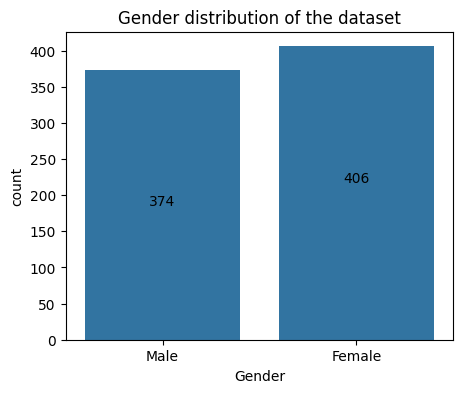

In [1438]:
# Define the size of image
plt.figure(figsize=(5, 4))
plt.title('Gender distribution of the dataset')

# Check gender distribution in the dataset
gender_ax = sns.countplot(x='Gender', data=formated_data)
gender_ax.set_xlabel('Gender')

# Add count of each bar in the bars
for i in gender_ax.containers:
    gender_ax.bar_label(i, fontsize=10, padding=-100)

The total difference of gender distribution is quite balanced here. The difference is only 32 people, which is about 4.1% of total sample we have here. We are good to move on here without any adjusment.

### Age Distribution

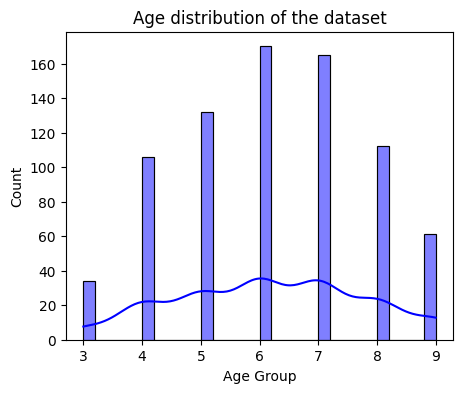

In [1439]:
# Histrogram of the age distribution
plt.figure(figsize=(5, 4))
age_ax = sns.histplot(data=formated_data, x='Age Group', bins=30, kde=True, color='blue', alpha=0.5)
plt.title('Age distribution of the dataset')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

The plot of age distribution looks pretty much normally distributed, which means that the values in the sample is symmetrically distributed around the mean value. It is not propably perfectly normally distributed, because we can see little skewness on left side of the plot. To check the normal distribution, we can use Shapiro-Wilk test here.

#### Shapiro-Wilk Test

In [1440]:
shapiro_age = shapiro(formated_data['Age Group'])
print(f'Shapiro-Wilk test for age distribution: W = {shapiro_age.statistic}, p-value = {shapiro_age.pvalue}')

Shapiro-Wilk test for age distribution: W = 0.9486334168469476, p-value = 7.897659591569174e-16


Shapiro-Wilk is test, which gives us statistical proof of normality of our feature, which was age in this scenario. In the Shapiro-Wilk, we are testing the null hypothesis that the sample we have is normally distributed. In this test we are interested in the statistic value but also p-value. In the age distribution we can see that we actually have pretty high value of W of 0.949. Value which is close to 1 indicate the there is closer adherence to a normal distribution. We also have our P-value here, which actually suggest that our null hypothesis cannot be rejected with its extremely small value of 7.89..-16. P-value needs to be lower than 0.05. This means that even its W value is really close of 1, the null hypothesis cannot be rejected and we cannot say that the sample is normally distributed. [2], [3]

### Living Environment Distribution

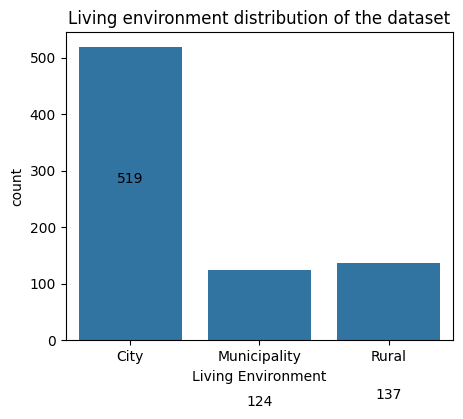

In [1441]:
# Define the size of image
plt.figure(figsize=(5, 4))
plt.title('Living environment distribution of the dataset')

# Check living environment distribution in the dataset
le_ax = sns.countplot(x='Living Environment', data=formated_data, order=['City', 'Municipality', 'Rural'])
le_ax.set_xlabel('Living Environment')

# Add count of each bar in the bars
for i in le_ax.containers:
    le_ax.bar_label(i, fontsize=10, padding=-100)

### Day Type Group

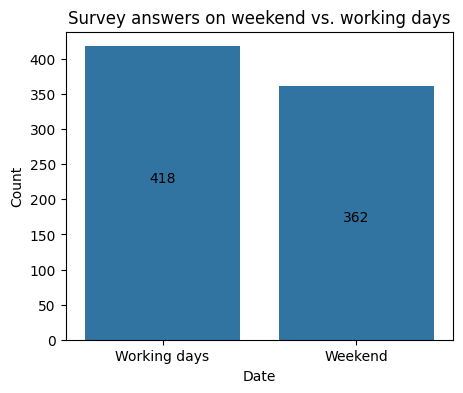

In [1442]:
# Define the size of image
plt.figure(figsize=(5, 4))
plt.title('Survey answers on weekend vs. working days')

# Create a new column to define if the date is weekday or weekend
date_ax = sns.countplot(x='Date', data=formated_data, order=['Working days', 'Weekend'])
date_ax.set_ylabel('Count')

# Add count of each bar in the bars
for i in date_ax.containers:
    date_ax.bar_label(i, fontsize=10, padding=-100)

There were 56 answers more in the working days than the weekend, which is pretty well balanced again and it should not cause any problems in our incoming estimations. The difference here is just only 7.2% of the whole sample.

### Spent Activities

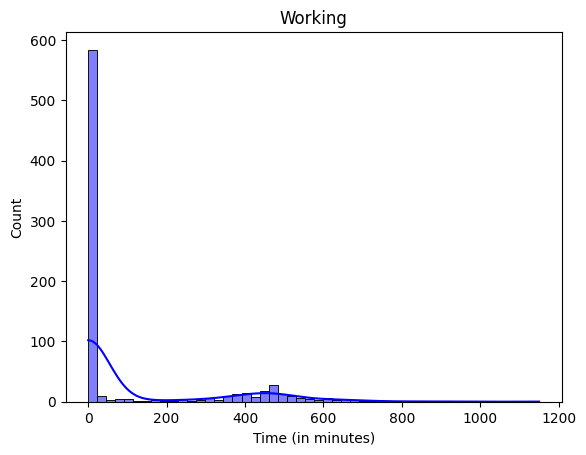

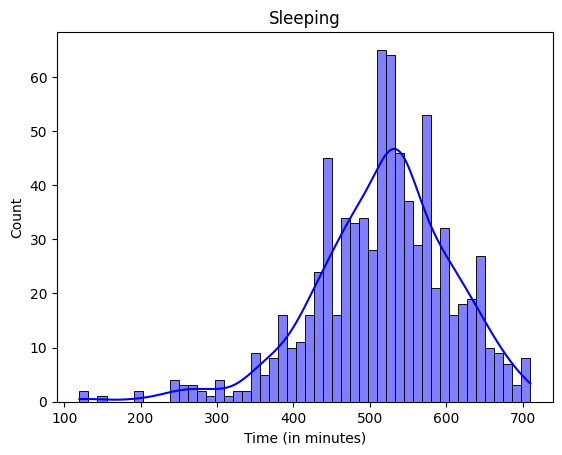

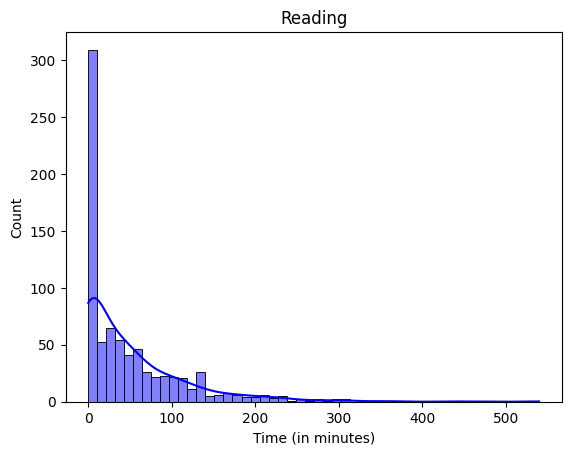

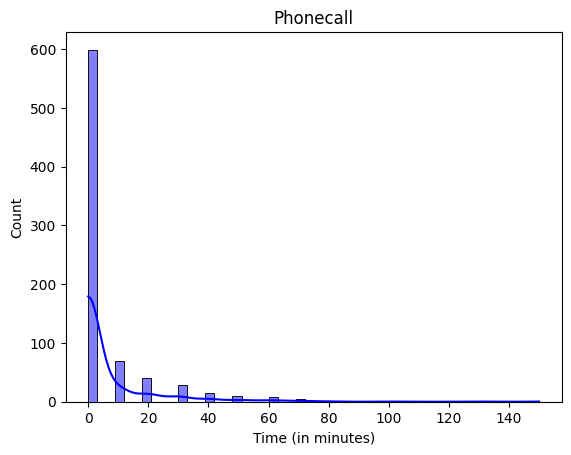

In [1443]:
# Now plot histogram of the activity values
for col in ["Working", "Sleeping", "Reading", "Phonecall"]:
    temp = pd.to_numeric(formated_data[col], errors='coerce')
    sns.histplot(temp, bins=50, kde=True, color='blue', alpha=0.5)
    plt.title(col)
    plt.xlabel('Time (in minutes)')
    plt.ylabel('Count')
    plt.show()

As we can see, there was huge amount of zero values in all activies except sleeping. This is obviously pretty reasonable, because the sleeping is basicly the only mandatory activity each people have to do. Interesting thing here was that how small was the amount of working in these activities. I would say that the reason for this might be that some people might be studying, which may lower the amount of answers for working. Sleeping activity is the only feature which has even a bit of form of normal distribution (even it is really much skewed on left). I will anyways do the Shapiro-Wilk test for all the activity features to see what we will get.

In [1444]:
# Check the shapiro test for normality for all the activities

for col in time_features:
    temp = pd.to_numeric(formated_data[col], errors='coerce')
    stat, p = shapiro(temp)
    print(f'Shapiro test for {col}: W={stat}, p-value={p}')
    alpha = 0.05
    if p > alpha:
        print(f'{col} is normally distributed\n')
    else:
        print(f'{col} is not normally distributed\n')

Shapiro test for Working: W=0.5730422279836014, p-value=7.357620804598092e-40
Working is not normally distributed

Shapiro test for Sleeping: W=0.9694675497154764, p-value=1.0741542619833891e-11
Sleeping is not normally distributed

Shapiro test for Reading: W=0.7557287328116769, p-value=2.1372840073873845e-32
Reading is not normally distributed

Shapiro test for Phonecall: W=0.4651393047335205, p-value=4.22954252473327e-43
Phonecall is not normally distributed



While all the p-values we got from the Shapiro test are clearly below 0.05, we can say that none of our activities are normally distributed. This information will be really important for the part where we are doing statistical testing for the estimations in the upcoming tasks. That was actually pretty big suprise to me because the sleeping activity looked normally distributed. But we can clearly see that the p-value in sleeping sample is really much more closer to 0.05 than other samples here, meaning that the Shapiro-Wilk test is working properly here. [2], [3]

### Visitin in theater or sport events in past 12 months

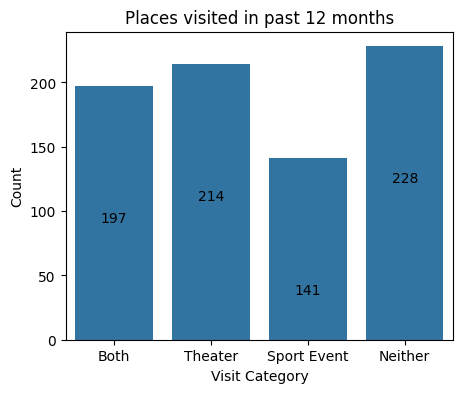

In [1445]:
# At first we want to define an function that checks if the values in the columns are either 1 or 2.
def visit_category(row):
    if row['Theater'] == 1 and row['Sport Event'] == 1:
        return 'Both'
    elif row['Theater'] == 1:
        return 'Theater'
    elif row['Sport Event'] == 1:
        return 'Sport Event'
    else:
        return 'Neither'

# Here we create a new column for formated_data that contains the visit category foe each person.
formated_data['Visit Category'] = formated_data.apply(visit_category, axis=1)

# Create a barplot of the visit categories
plt.figure(figsize=(5, 4))
plt.title('Places visited in past 12 months')
visit_category_ax = sns.countplot(x='Visit Category', data=formated_data, order=['Both', 'Theater', 'Sport Event', 'Neither'])
visit_category_ax.set_xlabel('Visit Category')
visit_category_ax.set_ylabel('Count')

for container in visit_category_ax.containers:
    visit_category_ax.bar_label(container, fontsize=10, padding=-100)

Here we can see now how each people have visited in theater or sport events in past 12 months. We can see that the visiting in sport event have not been that popular in our sample what theater visiting has been. It could be interesting to see that does genders differ in their visiting activity. Respectively, let's see also the differences between visiting on different genders.

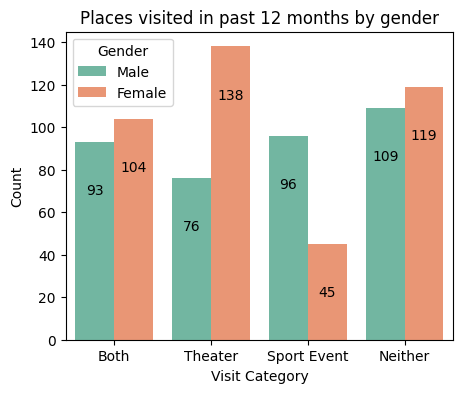

In [1446]:
# Check the differences between gender from the visit category
plt.figure(figsize=(5, 4))
plt.title('Places visited in past 12 months by gender')

visit_category_gender_ax = sns.countplot(x='Visit Category', data=formated_data, hue='Gender', order=['Both', 'Theater', 'Sport Event', 'Neither'], palette='Set2')

visit_category_gender_ax.set_xlabel('Visit Category')
visit_category_gender_ax.set_ylabel('Count')
plt.legend(title='Gender')

for container in visit_category_gender_ax.containers:
    visit_category_gender_ax.bar_label(container, fontsize=10, padding=-40)

### 2. Estimate how much time on average households spend daily on each activity.

In [1447]:
# Calculate the mean value of the time columns
time_means = pd.DataFrame(formated_data[time_features].mean(), columns=['Time in average (min)'])

# Conver the mean values to hours
time_means['Time in average (h)'] = time_means['Time in average (min)'] / 60
print(time_means)

           Time in average (min)  Time in average (h)
Working               104.641026             1.744017
Sleeping              516.448718             8.607479
Reading                49.923077             0.832051
Phonecall               6.128205             0.102137


As we can see, people have spent approximately 8 hours for sleeping (V32). This was quite expected as most people need 8 hours of sleep in general. Time spent for working was only little less than 2 hours, which may indicate that people were not possibly working on that day when they respons to the survey. Also, there might be a lot of people who are studying or unable to work, which could affect for the results.

The reading time was 50 minutes, which also indicated that people might have had a more relaxed day. In addition, 6 minutes for phone calls also sounds reasonable value and likely reflects typical modern short-duration communication.

Now in addition let's compare time spent in various activites differs with people living in the different living environment.



Average time that people living in the city spent on different activities:
            In average (min)  In average (h)
Working          106.608863        1.776814
Sleeping         514.566474        8.576108
Reading           50.963391        0.849390
Phonecall          5.780347        0.096339 

Average time that people living in the municipality spent on different activities:
            In average (min)  In average (h)
Working           98.306452        1.638441
Sleeping         519.516129        8.658602
Reading           42.903226        0.715054
Phonecall          6.290323        0.104839 

Average time that people living in the rural area spent on different activities:
            In average (min)  In average (h)
Working          102.919708        1.715328
Sleeping         520.802920        8.680049
Reading           52.335766        0.872263
Phonecall          7.299270        0.121655 



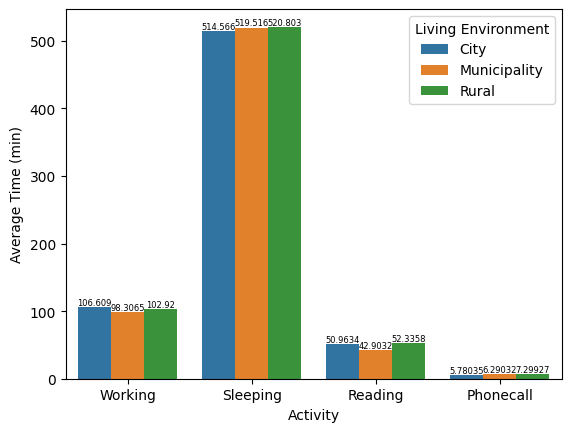

In [1448]:
# Create a new DataFrame for the time spent on different activities on each living environment
city_activities = pd.DataFrame(formated_data[formated_data['Living Environment'] == 'City'][time_features].mean(), columns=['In average (min)'])
city_activities['In average (h)'] = city_activities['In average (min)'] / 60
print('Average time that people living in the city spent on different activities:\n', city_activities, '\n')

municipality_activities = pd.DataFrame(formated_data[formated_data['Living Environment'] == 'Municipality'][time_features].mean(), columns=['In average (min)'])
municipality_activities['In average (h)'] = municipality_activities['In average (min)'] / 60
print('Average time that people living in the municipality spent on different activities:\n', municipality_activities, '\n')

rural_activities = pd.DataFrame(formated_data[formated_data['Living Environment'] == 'Rural'][time_features].mean(), columns=['In average (min)'])
rural_activities['In average (h)'] = rural_activities['In average (min)'] / 60
print('Average time that people living in the rural area spent on different activities:\n', rural_activities, '\n')

# Add the living environment to each DataFrame
city_activities['Living Environment'] = 'City'
municipality_activities['Living Environment'] = 'Municipality'
rural_activities['Living Environment'] = 'Rural'

# Combine the two DataFrames into one
activities = pd.concat([city_activities, municipality_activities, rural_activities])
activities = activities.reset_index().rename(columns={'index': 'Activity'})

# Melt the DataFrame for seaborn
melted_data = activities.melt(id_vars=['Activity', 'Living Environment'], value_vars=['In average (min)'], var_name='Metric', value_name='Average Time (min)')

# Plot the data
ax = sns.barplot(x='Activity', y='Average Time (min)', hue='Living Environment', data=melted_data)

# Plot the label for each bar
for i in ax.containers:
    ax.bar_label(i, fontsize=6)

### 3. With respect to which activities do men and women differ?

Average time that women spent on different activities:
            In average (min)  In average (h)
Working           84.729064        1.412151
Sleeping         518.201970        8.636700
Reading           53.349754        0.889163
Phonecall          9.482759        0.158046 

Average time that men spent on different activities:
            In average (min)  In average (h)
Working          126.256684        2.104278
Sleeping         514.545455        8.575758
Reading           46.203209        0.770053
Phonecall          2.486631        0.041444


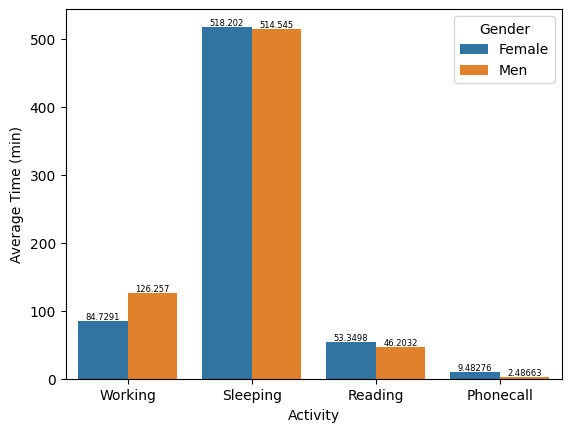

In [1449]:
# Differ activities between men and women.
women_activities = pd.DataFrame(formated_data[formated_data['Gender'] == 'Female'][time_features].mean(), columns=['In average (min)'])
women_activities['In average (h)'] = women_activities['In average (min)'] / 60

print('Average time that women spent on different activities:\n', women_activities, '\n')

men_activities = pd.DataFrame(formated_data[formated_data['Gender'] == 'Male'][time_features].mean(), columns=['In average (min)'])
men_activities['In average (h)'] = men_activities['In average (min)'] / 60
print('Average time that men spent on different activities:\n', men_activities)

women_activities['Gender'] = 'Female'
men_activities['Gender'] = 'Men'

# Combine the two DataFrames into one
activities = pd.concat([women_activities, men_activities])
activities = activities.reset_index().rename(columns={'index': 'Activity'})

# Melt the DataFrame for seaborn
melted_data = activities.melt(id_vars=['Activity', 'Gender'], value_vars=['In average (min)'], var_name='Metric', value_name='Average Time (min)')

# Plot the data
ax = sns.barplot(x='Activity', y='Average Time (min)', hue='Gender', data=melted_data)

# Plot the label for each bar
for i in ax.containers:
    ax.bar_label(i, fontsize=6)

### Statistical Testing
It is important to determine that values we have observed are actually statistically significant. To achive this, we can do T-Test, where we want to evaluate the validity of our assumptions. In reality, we want to assess whether men or women engage in certain types of activities more than the other.

The idea of T-Test is to assume that the null hypothesis - which says that there are no significant differences between groups we are comparing - is true. We want to evaluate that assumption and see if we can reject the null hypothesis, therby supporting the claim that a difference really exists. By doing that, we can confim that if there is statistical evidence at all that men and women differ with their used time for each activity. [4]

In [ ]:
# Let's start here with the t-test of working activity.
# Our null hypothesis here is that there is no difference of working engagement between men and female.
# If we get p-value less than 0.05, we can reject the null hypothesis.
ttest_work = ttest_ind(formated_data[formated_data['Gender'] == 'Male']['Working'], formated_data[formated_data['Gender'] == 'Female']['Working'], nan_policy='omit')
print(f'P-Value for working activity:', ttest_work.pvalue)

# Now do the same for sleeping activity.
# Null hypothesis here is also that there is no difference of sleeping
ttest_sleep = ttest_ind(formated_data[formated_data['Gender'] == 'Male']['Sleeping'], formated_data[formated_data['Gender'] == 'Female']['Sleeping'], nan_policy='omit')
print(f'P-Value for sleeping activity:', ttest_sleep.pvalue)

# Now do the same for reading activity.
ttest_read = ttest_ind(formated_data[formated_data['Gender'] == 'Male']['Reading'], formated_data[formated_data['Gender'] == 'Female']['Reading'], nan_policy='omit')
print(f'P-Value for reading activity:', ttest_read.pvalue)

# Phonecall activity
ttest_phone = ttest_ind(formated_data[formated_data['Gender'] == 'Male']['Phonecall'], formated_data[formated_data['Gender'] == 'Female']['Phonecall'], nan_policy='omit')
print(f'P-Value for phonecall activity:', ttest_phone.pvalue)

P-Value for working activity: 0.004285932087545437
P-Value for sleeping activity: 0.5722330394150875
P-Value for reading activity: 0.12651815330488733
P-Value for phonecall activity: 9.251877608676726e-11


Now we have calculated P-values for all the activities we are interested in. We see that there are two activities where P < 0.05. These activities are working and making phonecalls. While the P-value of working tasks are about 0.0043..., we can reject the null hypothesis and stick on the claim that men had slightly more time spent in work. The P-value for sleep activity was not less than 0.5, while the value was 0.5722... we cannot claim that men sleep more than women. The P-value for reading was 0.127..., which means that we cannot claim that women read more than men statistically. While the phone activity has P-value of 9.252...^-11,  we can reject the null hypothesis and claim that women spent more time on phone calls. [4]

### 4. With respect to which activities do working days and weekends differ?

As I already mentioned earlier, the reason why working time may look little low in the survey data might be that people may have answered for the surveys just in the they were not working. But well how it really matter in our data and is there differences between time spent on activities in working days and weekend.


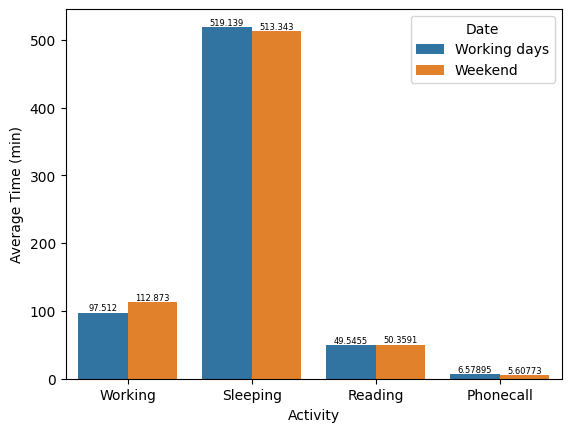

In [1451]:
# Now let's check how activities differ between weekdays and weekends.
weekday_activities = pd.DataFrame(formated_data[formated_data['Date'] == 'Working days'][time_features].mean(), columns=['In average (min)'])
weekday_activities['In average (h)'] = weekday_activities['In average (min)'] / 60

weekend_activities = pd.DataFrame(formated_data[formated_data['Date'] == 'Weekend'][time_features].mean(), columns=['In average (min)'])
weekend_activities['In average (h)'] = weekend_activities['In average (min)'] / 60

weekday_activities['Date'] = 'Working days'
weekend_activities['Date'] = 'Weekend'

# Combine the two DataFrames into one
activities = pd.concat([weekday_activities, weekend_activities])
activities = activities.reset_index().rename(columns={'index': 'Activity'})

# Melt the DataFrame for seaborn
melted_data = activities.melt(id_vars=['Activity', 'Date'], value_vars=['In average (min)'], var_name='Metric', value_name='Average Time (min)')

# Plot the data
ax = sns.barplot(x='Activity', y='Average Time (min)', hue='Date', data=melted_data)

# Plot the label for each bar
for i in ax.containers:
    ax.bar_label(i, fontsize=6)

### Statistical Testing

Now let's do the t-test for weekday and weekend. Our null hypothesis here is that there is no difference between weekday and weekend activity engagement. Again, like earlier, if we get p-value less than 0.05, we can reject the null hypothesis.

In [1452]:
# T-Test for working activity
ttest_work = ttest_ind(formated_data[formated_data['Date'] == 'Working days']['Working'], formated_data[formated_data['Date'] == 'Weekend']['Working'], nan_policy='omit')
print(f'P-Value for working activity:', ttest_work.pvalue)

# T-Test for sleeping activity
ttest_sleep = ttest_ind(formated_data[formated_data['Date'] == 'Working days']['Sleeping'], formated_data[formated_data['Date'] == 'Weekend']['Sleeping'], nan_policy='omit')
print(f'P-Value for sleeping activity:', ttest_sleep.pvalue)

# T-Test for reading activity
ttest_read = ttest_ind(formated_data[formated_data['Date'] == 'Working days']['Reading'], formated_data[formated_data['Date'] == 'Weekend']['Reading'], nan_policy='omit')
print(f'P-Value for reading activity:', ttest_read.pvalue)

# T-Test for phonecall activity
ttest_phone = ttest_ind(formated_data[formated_data['Date'] == 'Working days']['Phonecall'], formated_data[formated_data['Date'] == 'Weekend']['Phonecall'], nan_policy='omit')
print(f'P-Value for phonecall activity:', ttest_phone.pvalue)

P-Value for working activity: 0.2926536463831459
P-Value for sleeping activity: 0.3714116227223574
P-Value for reading activity: 0.8622311421595419
P-Value for phonecall activity: 0.3755866644882814


As we can see from the T-Test results, we cannot reject the null hypothesis from any of the activities at all. The closest value to P-value of 0.05 is for working activity, but still staying at pretty high of 0.280... In short, this means that we cannot statistically compare with our data how different activities differ between working days or weekend. [4]

### 5. Which activities are associated with each other?

There are couple different methods we are able to use identify associations between different activities from our data. In this task I am going to use following methods:

1. **Pearson Correlation Matrix**, which strenght is that, it can immediately show us which activities are linearilly having dependencies with each other. It tells us that how strong the dependency is and in which direction the dependency of these features are moving to. In Pearson Correlation Matrix we are interested of the results that should fit somewhere between -1 to 1. If the result we are having is greater than 0, we can talk about positive correlation, meaning that while the one value is increasing, another value should increase as well. Instead, if the value of our Pearson r, is lesser than 0, we can talk about negative correlation, which means that while the one feature value increases, another value decreases. Pearson value of 0 means that there are no correlation at all, meaning that there are no connection between these features. [5]

3. **Pairplot** is the final visualization I will use here to identify associations between different activities. Pairplot will also include the results of clustering, but there will be more another information, which might be beneficial to our final observations. In the pairplot we are going to have also histogram of individual variable distributions and linear regression line, which shows the straight line that models the relationship between the variables and enables us to spot trents in in noisy data, which we actually have here. [6]

In [1453]:
# Pearson correlation matrix of the activities
corr = formated_data[time_features].corr(method='pearson')

correlation_matrix = pd.DataFrame(corr, columns=['Working', 'Sleeping', 'Reading', 'Phonecall'])
print('Correlation matrix of the activities:\n\n', correlation_matrix, '\n')

Correlation matrix of the activities:

             Working  Sleeping   Reading  Phonecall
Working    1.000000 -0.355318 -0.221003  -0.053621
Sleeping  -0.355318  1.000000  0.015148   0.020673
Reading   -0.221003  0.015148  1.000000   0.050514
Phonecall -0.053621  0.020673  0.050514   1.000000 



From this correlation matrix we should be now able to read that how different activities actually correlate with each other. As I already mentioned earlier, number between -1 and 0 means that there is negative correlation between features, and otherwise if the value is between 0 and 1, there will be positive correlation between features.

From the pearson correlation matrix we can see that obviously there is perfect correlation between same features. Here we can also see that Working and sleeping activities shows to have a moderate relationship, likewise there looks to be some negative correlation on working and reading. The rest features are having very weak or near zero correlation, which suggest that these activities are largely independent in our dataset. [5]

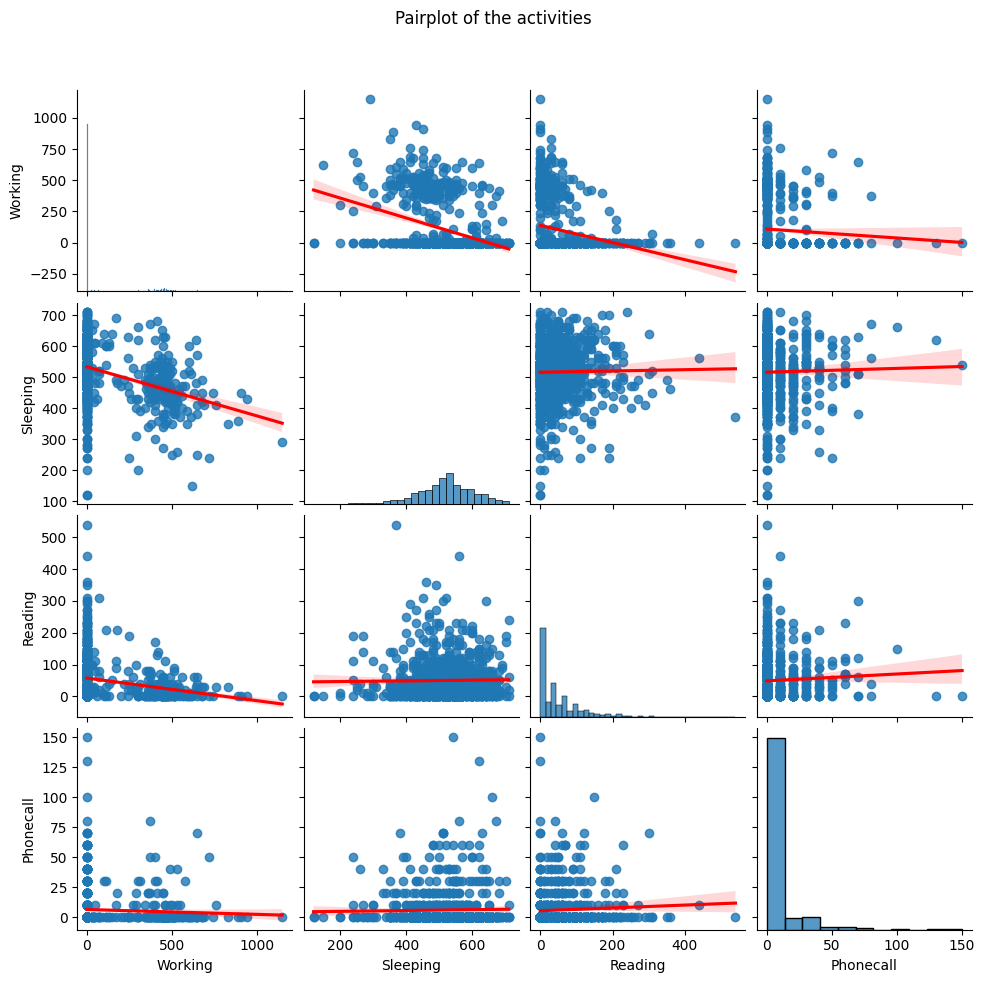

In [1454]:
# Now lets do the pairplot of the activities to see how they correlate with each other.
sns.pairplot(formated_data[time_features], diag_kind='hist', kind='reg', plot_kws={'line_kws': {'color': 'red'}})

# Plot the pairplot
plt.suptitle('Pairplot of the activities')
plt.subplots_adjust(top=0.9)
plt.show()

From this pairplot, we can clearly see that we are having a pretty much same observation like we had in pearsons correlation matrix earlier. Again we can see that working and sleeping are having their moderate negative correlation and working and sleeping are also having some negative correlation.

Interesting addition in this pairplot here is that we have now the confidence interval here. The confidence interval shows the range whitin the true regression line is likely to fall with its confidence value. The red area around our regression line is the confidence interval, where wider area suggest more uncertainty in the estimations of the relationship between variables. Otherwise, if the red area is narrow, the relationship is more stable and confident. Here we can see that working and sleeping both are actually giving the most relaible results, while reading and especially phonecall are having more wider area of confidence interval. This weaker confidence may be caused because both reading and phonecall features are having skewness in their data. [6]

## Final thoughts and conclusion

Now the project have come to the final line and it is time to make some final analysis of the project. I would say that from the data we got nice insights about people and their living behaviours. The dataset itself had pretty nice size, but I belive that the quality of data collecting could have been done better. I would say that different measuring strategies such as fully continuous values from 0 to 100 could be more beneficial than nine different groups of ages. Also the dataset with various marking of activities time values could have been uniformal. These kind of errors cause lot of extra work on preprocessing phase.

#### About the results we got

I belive that the project opened up nicely how different households and individuals spent their time. Even if we only had four different activities, there was some correlation between different features visible. I belive that in this project many different activites could be also beneficial to be analyzed here, because even if we handled the time spent in school, we did not consider how studying in school or caring child could effect for the results we got. I belive that the working feature did not gave enough data of peoples living behaviour, while being only activity that can be listed as "working".

All the demographic features gave us nice balanced results which were distributed pretty evenly, even none of these features were normally distributed. All the normal distributions were checked by using Shapiro-wilk test. We also made T-testing for all comparisions where we wanted to check how different groups of people spent their time. Using T-test will give robustness for our arguments, such as men have been in work for some more than women in our dataset. The main idea of T-test is to make sure that the observation is possibly to generalize in population.

#### What might be the future of this project and the dataset?

As I already mentioned earlier, there are still very much data that could be used to make insights of people livign behaviours. For example analyzing how people spend their time in school, job or home. There is also lot of different possibiilities where people have propably visited, which could give us much more information of how various groups are doing in their free time. If we could use much more data from the dataset to get more insights of associations of different acitivites and so on, there could be many machine learning methods possibly to use, which could estimate the behaviour of peoples living even better. In some activities, which had clear pattern like sleeping, we could use supervised learning methods like k-nn methods to classify various people for clusters. In some other features that did not have that clear patterns, we could use unsupervised learning methods like K-means to analyze how groups differ.

#### Final words

The project has given lot of practice for me to understand and work on data analysis projects. Where I belive I could work better in the future would be the project structure planning, because I belive I got stuck in unclear structure in some times, which took very much time to get more clear. I think that different encoding methods also can be done like One-hot-encoding, which I however did not find a use in this project now.

## References:

#### Data:

**habits.data**
   - Derived from "Teaching use data of the Time Use Survey" by Statistics Finland
   - Licensed under [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

#### Literature:

[1] https://www.datascience-pm.com/crisp-dm-2/

[2] https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

[5] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

[6] https://seaborn.pydata.org/generated/seaborn.pairplot.html
